In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# make the original data
series = np.sin((0.1*np.arange(400))**2)

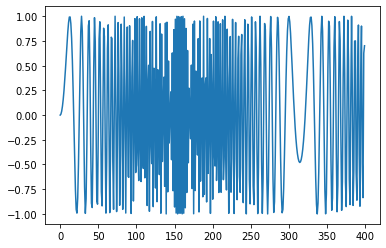

In [4]:
# Plot
plt.plot(series)
plt.show()

In [54]:
# Build the dataset
# we will use T past values to predict the next
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T for Dense layer
Y = np.array(Y)
N = len(Y)
print("X shape", X.shape, "Y shape", Y.shape)

X shape (390, 10) Y shape (390,)


In [55]:
### Try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01)
)

In [56]:
# train the model
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_split=0.2
)

Epoch 1/80
5/5 [==============================] - 0s 23ms/step - loss: 1.0284 - val_loss: 1.3545
Epoch 2/80
5/5 [==============================] - 0s 8ms/step - loss: 0.9374 - val_loss: 1.2755
Epoch 3/80
5/5 [==============================] - 0s 9ms/step - loss: 0.8671 - val_loss: 1.2037
Epoch 4/80
5/5 [==============================] - 0s 8ms/step - loss: 0.8003 - val_loss: 1.1365
Epoch 5/80
5/5 [==============================] - 0s 9ms/step - loss: 0.7459 - val_loss: 1.0757
Epoch 6/80
5/5 [==============================] - 0s 10ms/step - loss: 0.7035 - val_loss: 1.0015
Epoch 7/80
5/5 [==============================] - 0s 11ms/step - loss: 0.6604 - val_loss: 0.9368
Epoch 8/80
5/5 [==============================] - 0s 9ms/step - loss: 0.6329 - val_loss: 0.8657
Epoch 9/80
5/5 [==============================] - 0s 10ms/step - loss: 0.6088 - val_loss: 0.8149
Epoch 10/80
5/5 [==============================] - 0s 10ms/step - loss: 0.5854 - val_loss: 0.7676
Epoch 11/80
5/5 [=================

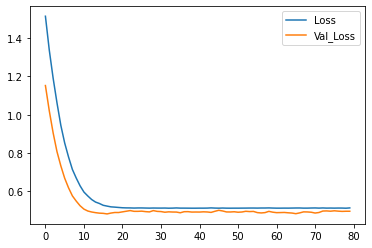

In [20]:
# plot loss per iteration
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val_Loss")
plt.legend()

(390, 1)


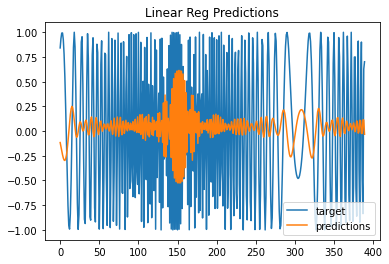

In [44]:
# One step forecast using the true target
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='target')
plt.plot(predictions, label='predictions')
plt.title("Linear Reg Predictions")
plt.legend()
plt.show()

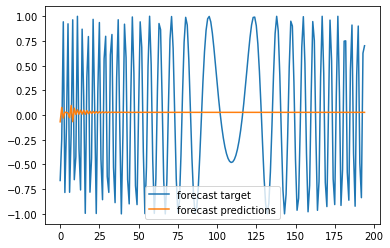

In [57]:
# Multi step forecast
validation_target = Y[-N//2:]
validation_pred = []

# first validation input
last_x = X[-N//2] # 1D array

while len(validation_pred) < len(validation_target):
    p = model.predict(last_x.reshape(1, T))[0,0]
    
    # update my predictions
    validation_pred.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    
plt.plot(validation_target, label='forecast target')
plt.plot(validation_pred, label='forecast predictions')
plt.legend()
plt.show()
    

In [58]:
### Now we will try LSTM
X = X.reshape(-1, T, 1)# N x T x D

# build the RNN model
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05)
)

In [60]:
# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_split=0.1
             )

Epoch 1/200
6/6 [==============================] - 1s 89ms/step - loss: 0.5577 - val_loss: 0.3979
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 0.5104 - val_loss: 0.3274
Epoch 3/200
6/6 [==============================] - 0s 11ms/step - loss: 0.4862 - val_loss: 0.3527
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 0.4442 - val_loss: 0.2582
Epoch 5/200
6/6 [==============================] - 0s 11ms/step - loss: 0.3799 - val_loss: 0.3011
Epoch 6/200
6/6 [==============================] - 0s 11ms/step - loss: 0.3246 - val_loss: 0.1737
Epoch 7/200
6/6 [==============================] - 0s 11ms/step - loss: 0.2503 - val_loss: 0.1560
Epoch 8/200
6/6 [==============================] - 0s 11ms/step - loss: 0.1792 - val_loss: 0.1203
Epoch 9/200
6/6 [==============================] - 0s 17ms/step - loss: 0.1145 - val_loss: 0.1000
Epoch 10/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0762 - val_loss: 0.0955
Epoch 11/200
6/6 [=

6/6 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0085
Epoch 85/200
6/6 [==============================] - 0s 9ms/step - loss: 9.6023e-04 - val_loss: 0.0085
Epoch 86/200
6/6 [==============================] - 0s 9ms/step - loss: 9.0827e-04 - val_loss: 0.0100
Epoch 87/200
6/6 [==============================] - 0s 9ms/step - loss: 8.2676e-04 - val_loss: 0.0114
Epoch 88/200
6/6 [==============================] - 0s 9ms/step - loss: 8.3342e-04 - val_loss: 0.0053
Epoch 89/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 90/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0016 - val_loss: 0.0147
Epoch 91/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 0.0111
Epoch 92/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 93/200
6/6 [==============================] - 0s 9ms/step - loss: 6.9381e-04 - val_loss: 0.0087
Epoch 94/

Epoch 165/200
6/6 [==============================] - 0s 10ms/step - loss: 8.7365e-04 - val_loss: 0.0094
Epoch 166/200
6/6 [==============================] - 0s 8ms/step - loss: 8.3664e-04 - val_loss: 0.0097
Epoch 167/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0096
Epoch 168/200
6/6 [==============================] - 0s 10ms/step - loss: 7.0708e-04 - val_loss: 0.0063
Epoch 169/200
6/6 [==============================] - 0s 9ms/step - loss: 6.0638e-04 - val_loss: 0.0097
Epoch 170/200
6/6 [==============================] - 0s 10ms/step - loss: 7.6001e-04 - val_loss: 0.0043
Epoch 171/200
6/6 [==============================] - 0s 13ms/step - loss: 5.8944e-04 - val_loss: 0.0100
Epoch 172/200
6/6 [==============================] - 0s 10ms/step - loss: 6.0493e-04 - val_loss: 0.0056
Epoch 173/200
6/6 [==============================] - 0s 9ms/step - loss: 7.6037e-04 - val_loss: 0.0051
Epoch 174/200
6/6 [==============================] - 0s 9ms/step - loss

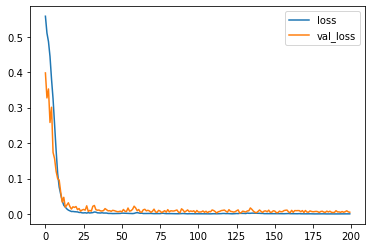

In [61]:
# plot
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


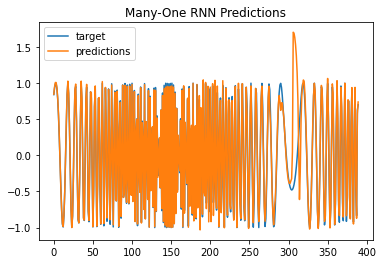

In [64]:
# one step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='target')
plt.plot(predictions, label='predictions')
plt.title("Many-One RNN Predictions")
plt.legend()
plt.show()

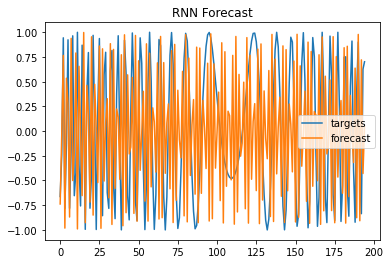

In [65]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()